In [1]:
import numpy as np
import matplotlib.pyplot as plt

import torch
import torch.nn as nn

In [2]:
from IPython import display

In [3]:
import matplotlib_inline.backend_inline

matplotlib_inline.backend_inline.set_matplotlib_formats('svg')

## 1. Create Data

In [4]:
import seaborn as sns

In [5]:
iris = sns.load_dataset("iris")

In [6]:
iris.shape

(150, 5)

In [7]:
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [8]:
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


## 2. Converting to tensor 

In [9]:
arr = iris[iris.columns[0:4]].values

#### Predictiors or Independent features

In [10]:
data = torch.tensor(arr ,dtype = torch.float )
data[:5]

tensor([[5.1000, 3.5000, 1.4000, 0.2000],
        [4.9000, 3.0000, 1.4000, 0.2000],
        [4.7000, 3.2000, 1.3000, 0.2000],
        [4.6000, 3.1000, 1.5000, 0.2000],
        [5.0000, 3.6000, 1.4000, 0.2000]])

#### Labels

In [11]:
# labels = np.zeros(shape = len(iris))

In [12]:
labels = torch.zeros(size = ( len(iris), )  ,dtype = torch.long)

In [13]:
labels

tensor([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0])

In [14]:
iris["species"].value_counts()

setosa        50
versicolor    50
virginica     50
Name: species, dtype: int64

In [15]:
labels[iris["species"] == "versicolor"] = 1

In [16]:
labels[iris["species"] == "virginica"]  = 2

    setosa       0
    versicolor   1
    virginica    2

In [17]:
labels

tensor([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
        2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
        2, 2, 2, 2, 2, 2])

## 3. Create ANN Model

In [18]:
def createANNirismodel(LR):

    ANNiris = nn.Sequential(
                           # Input Layer  :  4 -inputs , 64 - Neurons , 64 -outputs
                           nn.Linear(4,64),
                           nn.ReLU(),
        
                           # Hidden layer : 64 - inputs ,64 - Neurons,  64 - outputs 
                           nn.Linear(64,64),
                           nn.ReLU(),

                           # Output Layer :   64 - Inputs ,3- Neurons ,  3 -outputs
                           nn.Linear(64,3)
                           )

    # Inbuilt - LogSoftMax(nn.LogSoftmax) function and 
    #           NegativeLogLikelihoodLoss(nn.NLLLoss) implementation

    # Useful when training a classification problem with `C` classes.
    lossfunc = nn.CrossEntropyLoss()

    # Optimzer 

    optimizer = torch.optim.SGD(params = ANNiris.parameters() , lr = LR)

    return ANNiris,lossfunc,optimizer

## 4. Model Training

In [19]:
from sklearn.model_selection import train_test_split

In [20]:
# train the model

def trainTheModel(Model , lossfunc , optimizer ,data , labels, trainsize ,epochs ):

    # initialize losses
    losses = torch.zeros(epochs)
    trainAcc = []
    testAcc  = []
    
    # Train-Test Split
    X_train, X_test, y_train, y_test = train_test_split(data, labels, train_size = trainsize)

    # loop over epochs
    for epochi in range(epochs):

        # forward pass and loss
        yHat = Model(X_train)
        loss = lossfunc(yHat,y_train)

        # backprop
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        # compute training accuracy
        trainAcc.append( 100*torch.mean( (torch.argmax(yHat,axis=1) == y_train).float() ).item() )

        # test accuracy
        predlabels = torch.argmax( ANNiris(X_test),axis=1 )
        testAcc.append( 100*torch.mean((predlabels == y_test).float()).item() )

    # function output
    return trainAcc,testAcc


## 5. Model Testing

In [21]:
# Test the model by running it once

# create a model
ANNiris,LossFunc,Optimizer = createANNirismodel(LR = 0.01)

# train the model
# NOTE: the input is the training proportion, not the test proportion!

# trainTheModel(Model , lossfunc , optimizer ,data , labels, trainsize ,epochs )

trainAcc,testAcc = trainTheModel(Model = ANNiris , 
                                 lossfunc = LossFunc , 
                                 optimizer = Optimizer,
                                 data = data , labels = labels, 
                                 trainsize = 0.8 ,epochs = 200)


## 6. Visualization

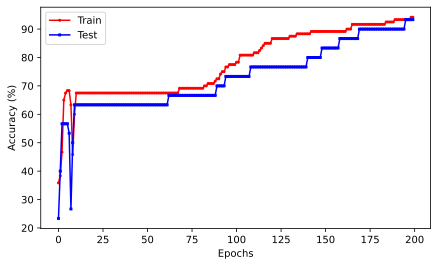

In [22]:
# plot the results

fig = plt.figure(figsize=(7,4))

plt.plot(trainAcc,'ro-' , markersize = 2)
plt.plot(testAcc,'bs-' , markersize = 2)
plt.xlabel('Epochs')
plt.ylabel('Accuracy (%)')
plt.legend(['Train','Test'])
plt.show()

## 7. Parametric Experiment 

In [32]:
trainSetSizes = np.linspace(.2,.8,9)

numepochs = 200
allTrainAcc = np.zeros((len(trainSetSizes),numepochs))
allTestAcc = np.zeros((len(trainSetSizes),numepochs))

for i in range(len(trainSetSizes)):
  
    # Model Creation
    ANNiris,LossFunc,Optimizer = createANNirismodel(LR = 0.01)

    # Model Training
    trainAcc,testAcc = trainTheModel(Model = ANNiris , 
                                 lossfunc = LossFunc , 
                                 optimizer = Optimizer,
                                 data = data , labels = labels, 
                                 trainsize = 0.8 ,epochs = numepochs)

    # store the results
    allTrainAcc[i,:] = trainAcc
    allTestAcc[i,:] = testAcc

## 8. Visualization

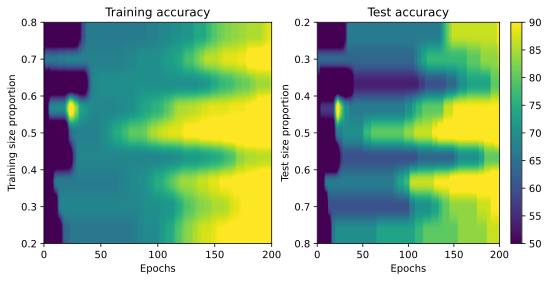

In [40]:
fig,ax = plt.subplots(1,2,figsize=(9,4))

ax[0].imshow(allTrainAcc,aspect='auto',
             vmin=50,vmax=90, extent=[0,numepochs,trainSetSizes[0] , trainSetSizes[-1]])

ax[0].set_xlabel('Epochs')
ax[0].set_ylabel('Training size proportion')
ax[0].set_title('Training accuracy')

p = ax[1].imshow(allTestAcc,aspect='auto',
             vmin=50,vmax=90, extent=[0,numepochs,trainSetSizes[-1] , trainSetSizes[0] , ])

ax[1].set_xlabel('Epochs')
ax[1].set_ylabel('Test size proportion')
ax[1].set_title('Test accuracy')
fig.colorbar(p,ax=ax[1])

plt.show()